
# Logistic Regression with Python

For this tutorial we will be working with [Titanic Dataset from Kaggle] (https://www.kaggle.com/c/titanic). This is a very famous dataset and often a student's first step in machine learning!

We will try to guess the "survived or deceased" classification.
Let's begin our understanding of applying Logistic Regression in Python for classification.

We will be using a "semi-cleaned" version of the Titanic dataset, if you use the dataset hosted directly on Kaggle, you may need to do some additional cleanup that is not shown in this lesson notebook.

## Episode 1: Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Episode 2: Get the Data

Let's start by reading in the train_titanic.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('input/train_titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Episode 3: Exploratory Data Analysis(EDA)

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

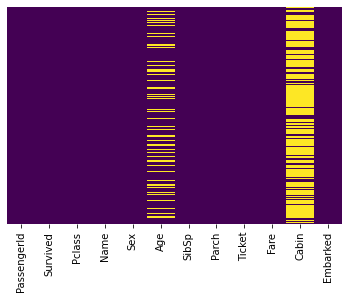

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

About 20 percent of age data is missing. Incomplete Age is probably small enough to be reasonably altered by some type of imputation. Looking at the cabin column, it seems like we're missing too much of this data to do something fundamentally useful. We'll probably cancel it later or change it to another property like "Known Cabin: 1 or 0".

Let's continue by visualizing some more data! Watch the video for full descriptions of these graphics, this code is for reference only.

<AxesSubplot:xlabel='Survived', ylabel='count'>

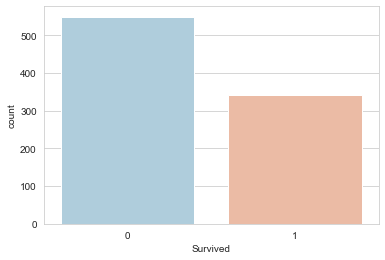

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

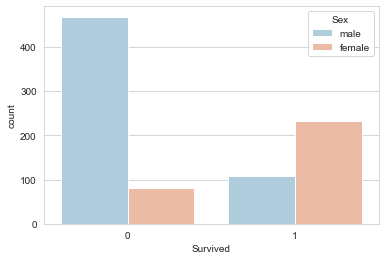

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

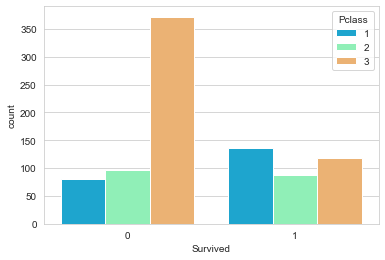

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

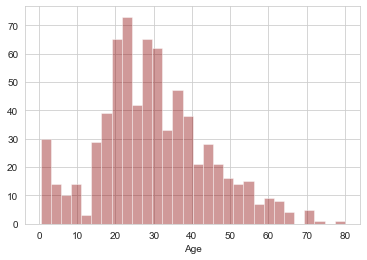

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

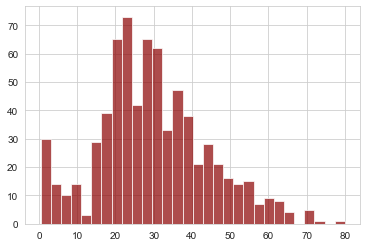

In [8]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

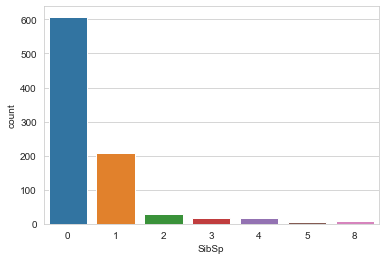

In [9]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

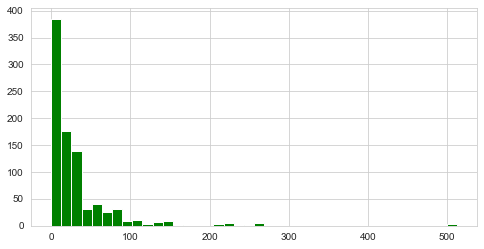

In [10]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Episode 4: Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [11]:
# If you have the Cufflinks library installed, do not run this code line.
!pip install cufflinks

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Episode 5: Data Cleaning

Instead of removing missing age data rows, we want to fill in missing age data. One way to do this is to enter the average age of all passengers (imputation).
But we can be smarter about it and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

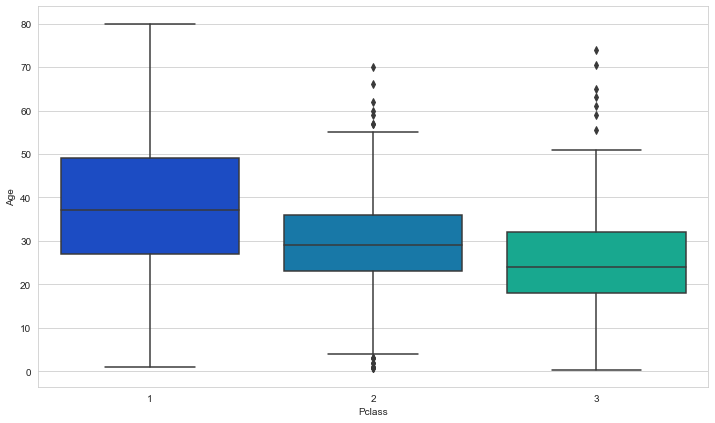

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

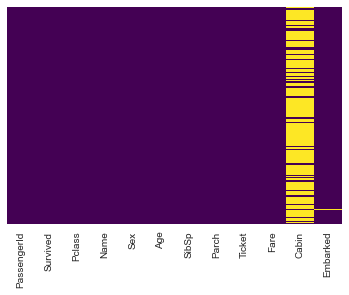

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.dropna(inplace=True)

## Episode 6: Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise, our machine learning algorithm cannot take these features directly as input.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Episode 7: Building a Logistic Regression model

Let's start by dividing our data into a training set and a test set (there's another test.csv file you can play in case you want to use all this data for training).

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.3, 
                                                    random_state=101)

## Training and Predicting

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

# Episode 8: Evaluation

We can check precision,recall,f1-score using classification report!

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.70       104

    accuracy                           0.80       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267




## 1.LogisticRegression_ConfusionMatrix_ROC_AUC

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("input/Churn_Modelling.xlsx")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


## 資料清洗
1. 確定哪些資料是無意義 (unique = 1)
2. 清除不必要資料 "RowNumber" , "CustomerId" , "Surname"
3. 將物件項目 (object) 轉換 encode to (int)

In [34]:
# deleting RowNumber , CustomerId and Surname 
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [35]:
# Label encode the Object Datatypes 
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [36]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [37]:
# one hot encode geography 
# optional 

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()

#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]

data = data.drop(["Geography"] , axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619.0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,0.0,0.0
1,608.0,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,0.0,0.0
3,699.0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,1.0,0.0,0.0
4,850.0,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [38]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [39]:
# Feature and Target vector

X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [40]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [41]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

## 正規化 check whether data is standardized (mean should be 1)

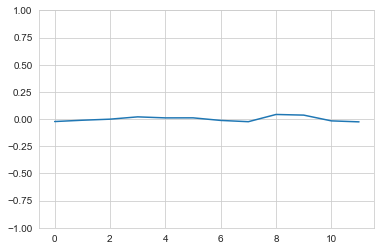

In [42]:
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

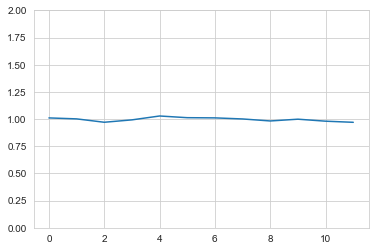

In [43]:
# Check variances 
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

## LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)

In [45]:
# Model Accuracy Score 準確率 

def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

In [46]:
Accuracy(Ytest , predictions)

0.8215

## Confusion Matrix 混淆矩陣

Confusion Matrix 是用來評估模型好壞常見的方法。他還可以用來加以計算Accuracy, Precision, Recell, F值等衡量指標。在不同情況可能會對不同指標感興趣。從中導入混淆(confusion)、度量(metrics)、準確度(accuracy)、精確度(precision)、召回率(recall)。

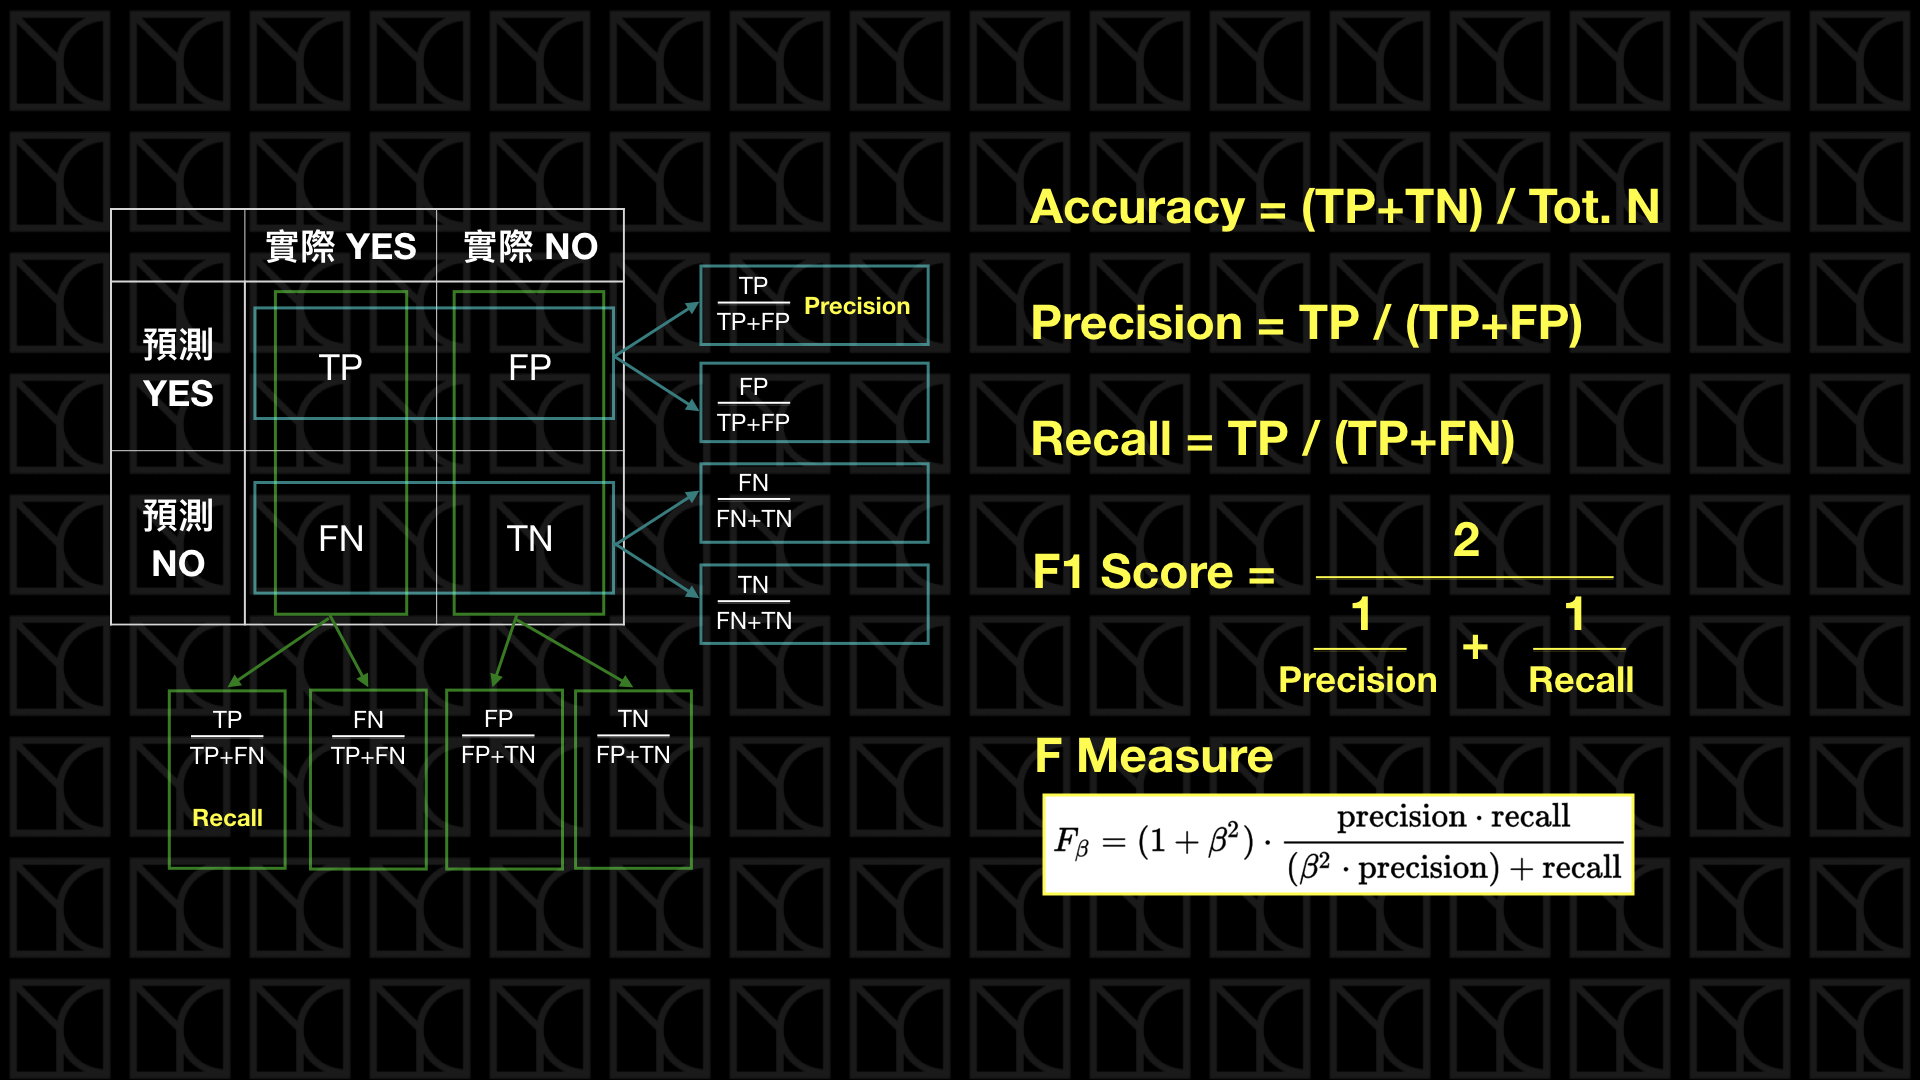

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

def precision(label, confusion_matrix):  #精確度
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):     #召回率
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def f1_score(precision , recall):        # (精確度*召回率) / (精確度+召回率)
    return 2 * (precision * recall)/(precision + recall)

<AxesSubplot:>

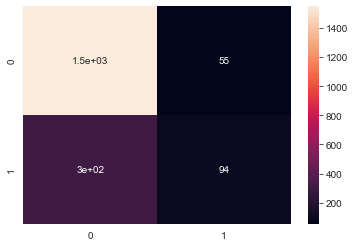

In [48]:
matrix = confusion_matrix(Ytest , predictions)
sns.heatmap(matrix , annot=True)

In [49]:
precision(1 , matrix) , recall(1 , matrix)
# 精度為 0.63，召回為 0.23
# 大部分的零被歸為零，但大多數的歸零，這清楚地看到我們的模型非常偏向於零。

(0.6308724832214765, 0.23737373737373738)

In [50]:
print(f'Accuracy Score: {accuracy_score(Ytest,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(Ytest, predictions)}')
print(f'Area Under Curve: {roc_auc_score(Ytest, predictions)}')
print(f'Recall score: {recall_score(Ytest,predictions)}')

Accuracy Score: 0.8215
Confusion Matrix: 
[[1549   55]
 [ 302   94]]
Area Under Curve: 0.6015422302828787
Recall score: 0.23737373737373738


##  find a way to increase our recall.
利用 Weighting Labels (class weight) 優先處理少數樣本來處理不平衡

In [51]:
# count the number of 0 and 1
# 10,000 total samples, 7963 samples are zero

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0.0: 7963, 1.0: 2037}


In [52]:
for key , value in value_counts.items():
    value_counts[key] = value/len(data)

print(value_counts)

{0.0: 0.7963, 1.0: 0.2037}


In [53]:
class_weights = {}

for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{0.0: 0.2037, 1.0: 0.7963}

In [54]:
class_weights = {0 : 20.37 , 1 : 79.73}

In [55]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(class_weight=class_weights)  #將 class 作為 LogisticRegression 的參數訓練我們的model
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)

In [56]:
Accuracy(Ytest , predictions) 
#準確度(accuracy)從 0.63 -> 0.70

0.7015

<AxesSubplot:>

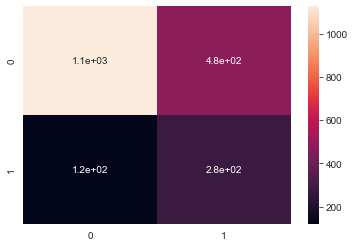

In [57]:
import seaborn as sns 

matrix = confusion_matrix(Ytest , predictions)
sns.heatmap(matrix , annot=True)

In [58]:
precision(1 , matrix) , recall(1 , matrix)

(0.3665338645418327, 0.696969696969697)

In [59]:
'''
我們已將召回率提高到三倍，但精度略有下降
原先精確度(precision)、召回率(recall)為
(0.6308724832214765, 0.23737373737373738)
'''

print(f'Accuracy Score: {accuracy_score(Ytest,predictions)}')
print(f'Confusion Matrix: \n{confusion_matrix(Ytest, predictions)}')
print(f'Area Under Curve: {roc_auc_score(Ytest, predictions)}')
print(f'Recall score: {recall_score(Ytest,predictions)}')

Accuracy Score: 0.7015
Confusion Matrix: 
[[1127  477]
 [ 120  276]]
Area Under Curve: 0.6997940754175168
Recall score: 0.696969696969697


## Confusion Matrix 混淆矩陣 的延伸 ROC AUC

- ROC曲線：接收者操作特徵曲線(receiver operating characteristic curve)
- AUC (Area Under Curve) 被定義為ROC曲線下的面積

In [60]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(Xtrain , Ytrain)

predictions = model.predict(Xtest)
pred_probs = model.predict_proba(Xtest)
# sample probabilities 
pred_probs[:3]

array([[0.78851495, 0.21148505],
       [0.85005476, 0.14994524],
       [0.89806886, 0.10193114]])

In [61]:
# Get the probs of only Churn = "1"
pred_probs = pred_probs[:, 1]

[[1549   55]
 [ 302   94]]


<AxesSubplot:>

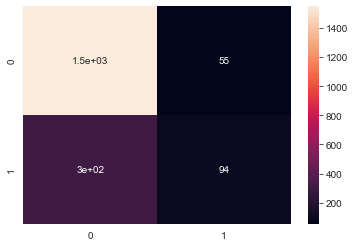

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,\
                            recall_score,roc_curve,roc_auc_score

matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [63]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))
print("Precision : " , precision_score(Ytest , predictions))
print("Precision : " , recall_score(Ytest , predictions))

Validation Accuracy :  0.8215
Precision :  0.6308724832214765
Precision :  0.23737373737373738


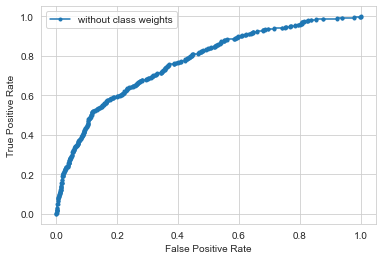

In [64]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='without class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [65]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : " , Auc)

 Area Under Curve :  0.770071349404267


**Applying Class Weights**

find a way to increase our recall. 
利用 Weighting Labels (class weight) 優先處理少數樣本來處理不平衡

In [66]:
# finding class weights 

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0.0: 7963, 1.0: 2037}


In [67]:
class_weights = {0 : 20.37 , 1 : 79.63}

In [68]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(class_weight=class_weights)
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)
pred_probs = model.predict_proba(Xtest)

[[1128  476]
 [ 120  276]]


<AxesSubplot:>

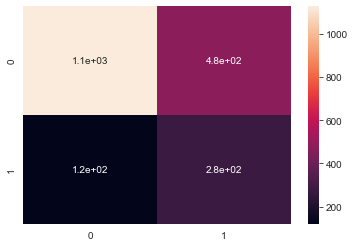

In [69]:
# Get the probs of only Churn = "1"
pred_probs = pred_probs[:, 1]
matrix = confusion_matrix(Ytest , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [70]:
def Accuracy(Truths , Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : " , Accuracy(Ytest , predictions))
print("Precision : " , precision_score(Ytest , predictions))
print("Precision : " , recall_score(Ytest , predictions))

Validation Accuracy :  0.702
Precision :  0.3670212765957447
Precision :  0.696969696969697


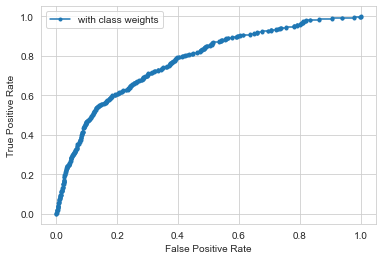

In [71]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='with class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [72]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : " , Auc)

 Area Under Curve :  0.7736104813723268


## 2.-----Product------

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [74]:
data=pd.read_csv("input/Product.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [75]:
X=data.iloc[:,[2,3]].values
Y=data.iloc[:,4].values

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2)
np.shape(X_train)

(320, 2)

In [78]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [79]:
Y_predicted=model.predict(X_test)
Y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [80]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [81]:
matrix=metrics.confusion_matrix(Y_test,Y_predicted)
matrix

array([[50,  4],
       [10, 16]])

<AxesSubplot:>

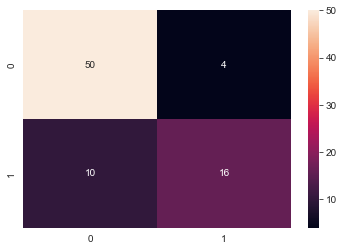

In [82]:
import seaborn as sns
sns.heatmap(matrix,annot=True)

## 3.LogisticRegression_CustomizedPricing

In [83]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

bids= pd.read_excel('input/Bid_Pricing.xlsx')
bids.head()
#bids.describe()
#bids.accept.value_counts()
#bids.shape

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,44160,0,1,0,0,0
1,2,3000,0.081092,2,12,210680,1,1,0,0,1
2,3,3000,0.071814,6,12,1000000,1,1,0,0,1
3,4,3000,0.091343,10,12,61892,0,0,1,0,0
4,5,3000,0.078224,5,12,235367,1,0,1,0,1


In [84]:
model= LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [85]:
x= bids[['intrest rate']]
y= bids.accept.values

In [86]:
model.coef_

array([[2.20986039, 1.24717421]])

In [87]:
model.intercept_

array([-1.07678074])

In [88]:
import seaborn as sns
bids.head()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,44160,0,1,0,0,0
1,2,3000,0.081092,2,12,210680,1,1,0,0,1
2,3,3000,0.071814,6,12,1000000,1,1,0,0,1
3,4,3000,0.091343,10,12,61892,0,0,1,0,0
4,5,3000,0.078224,5,12,235367,1,0,1,0,1


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='yearly income'>

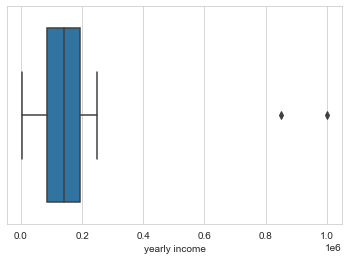

In [89]:
sns.boxplot(bids['yearly income'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='amount requested '>

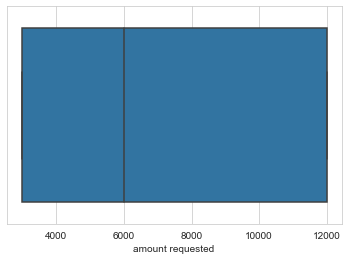

In [90]:
sns.boxplot(bids.iloc[:,1])

In [91]:
##minmax_scaler
bids_scaled= bids.copy()
bids_scaled['yearly income']= (bids['yearly income']-bids['yearly income'].min())/(bids['yearly income'].max()-bids['yearly income'].min())
bids_scaled.head()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,0.039357,0,1,0,0,0
1,2,3000,0.081092,2,12,0.206714,1,1,0,0,1
2,3,3000,0.071814,6,12,1.000000,1,1,0,0,1
3,4,3000,0.091343,10,12,0.057178,0,0,1,0,0
4,5,3000,0.078224,5,12,0.231525,1,0,1,0,1


In [92]:
X= bids_scaled.drop(['accept','Customer'],axis=1).values
y= bids_scaled.accept.values

In [93]:
model_seg= LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
model_seg.fit(X,y)

LogisticRegression(C=inf)

In [94]:
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices,build_design_matrices

In [95]:
### Grid search cross validation

model_cv= LogisticRegression(penalty='l2')
param_grid= {'C': np.linspace(0.01,50,40)}
grid_cv= GridSearchCV(model_cv,param_grid,scoring='roc_auc')
grid_model=grid_cv.fit(X,y)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

In [96]:
grid_model.best_params_
grid_model.best_score_

0.6848612265213305

In [97]:
prediction_cv= grid_model.predict(X)
acc= (y== prediction_cv).mean()
acc

0.7081911262798635

In [98]:
### model interaction
###import bidding prices without spaces
### Grid search cross validation

model_cv= LogisticRegression(penalty='l2')
param_grid= {'C': np.linspace(0.01,50,40)}
grid_cv= GridSearchCV(model_cv,param_grid,scoring='roc_auc')
bids= pd.read_excel('input/Bid_Pricing_no_space.xlsx')
bids_scaled= bids.copy()
bids_scaled['yearly_income']= (bids_scaled['yearly_income']-bids_scaled['yearly_income'].min())/(bids_scaled['yearly_income'].max()-bids_scaled['yearly_income'].min())
bids_scaled

,Customer,amount_requested,intrest_rate,years_experi,payment_duration,yearly_income,white_collar,call_centre,internet,direct,accept
0,1,3000,0.089446,15,12,0.039357,0,1,0,0,0
1,2,3000,0.081092,2,12,0.206714,1,1,0,0,1
2,3,3000,0.071814,6,12,1.000000,1,1,0,0,1
3,4,3000,0.091343,10,12,0.057178,0,0,1,0,0
4,5,3000,0.078224,5,12,0.231525,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13473,13474,12000,0.083425,5,36,0.061353,0,1,0,0,0
13474,13475,12000,0.092181,1,36,0.245458,1,1,0,0,1
13475,13476,12000,0.088885,18,36,0.062362,0,1,0,0,1
13476,13477,12000,0.072267,8,36,0.189906,1,0,1,0,1


In [99]:
matrix1= dmatrices('accept ~ amount_requested * intrest_rate * years_experi*payment_duration*yearly_income*white_collar*call_centre*internet*direct',bids_scaled)
matrix1

(DesignMatrix with shape (13478, 1)
   accept
        0
        1
        1
        0
        1
        1
        1
        0
        1
        1
        0
        0
        1
        1
        1
        1
        1
        1
        1
        1
        0
        1
        1
        1
        1
        0
        1
        1
        1
        0
   [13448 rows omitted]
   Terms:
     'accept' (column 0)
   (to view full data, use np.asarray(this_obj)),
 DesignMatrix with shape (13478, 512)
   Columns:
     ['Intercept',
      'amount_requested',
      'intrest_rate',
      'amount_requested:intrest_rate',
      'years_experi',
      'amount_requested:years_experi',
      'intrest_rate:years_experi',
      'amount_requested:intrest_rate:years_experi',
      'payment_duration',
      'amount_requested:payment_duration',
      'intrest_rate:payment_duration',
      'amount_requested:intrest_rate:payment_duration',
      'years_experi:payment_duration',
      'amount_requested:years_experi:p

In [100]:
grid_inter= grid_cv.fit(matrix1[1],np.ravel(matrix1[0]))
grid_inter.best_score_

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j

0.8163615883082038

In [101]:
prediction_inter= grid_inter.predict(matrix1[1])
prediction_inter

array([1., 1., 1., ..., 0., 1., 1.])

In [102]:
(y== prediction_inter).mean()

0.7397981896423802

In [103]:
### a customer who is applying for a 200000 loan ,yearly income of 120000, internet, 
#12 years of experience,white collar،payment duration of 36 month 
prediction_data= bids_scaled.iloc[0:500,1:10]
prediction_data['amount_requested']=20000
prediction_data['intrest_rate']=np.linspace(0.07,0.15,500)
prediction_data['years_experi']=12
prediction_data['payment_duration']=36
prediction_data['yearly_income']= (120000- bids['yearly_income'].min())/(bids['yearly_income'].max()- bids['yearly_income'].min())
prediction_data['white_collar']=1
prediction_data['call_centre']=0
prediction_data['internet']=1
prediction_data['direct']=0
prediction_data['accept']=1

In [104]:
prediction_matrix= dmatrices('accept~amount_requested * intrest_rate * years_experi*payment_duration*yearly_income*white_collar*call_centre*internet*direct',prediction_data)
predicted_prob= grid_inter.predict_proba(prediction_matrix[1])

## 4.sklearn-LogisticRegression_SVM

In [ ]:
#loading basic dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

data=pd.read_csv("input/Iris2.csv")
data.head()

In [ ]:
#info axix
data.keys()  

In [ ]:
#statistical information
data.describe()

In [ ]:
#loading onto X and y values
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
#Converting categorical to numerical value
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
#transforming y values
y=lb.fit_transform(y)

In [ ]:
#spliting the dataset 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [ ]:
#shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
#Linear SVM model
svc_clf=SVC(kernel='linear')
svc_clf.fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)

In [ ]:
#confusion matrix
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

In [ ]:
#accuracy and classification report
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

In [ ]:
#rbf svm model
svc_clf_rbf=SVC(kernel='rbf')
svc_clf_rbf.fit(X_train,y_train)
y_pred=svc_clf_rbf.predict(X_test)

In [ ]:
#confusion matrix
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)

In [ ]:
#accuracy and classification report
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

## 5.sklearn-LogisticRegression_RFECV_KflodsCV_Hyperparameters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("input/Churn_Modelling.xlsx")
data.head()

## Data Cleaning
1. 確定哪些資料是無意義 (unique = 1)
2. 清除不必要資料 "RowNumber" , "CustomerId" , "Surname"
3. 將物件項目 (object) 轉換 encode to (int)

In [ ]:
# checking the percentage unique 
# All data are Uniques ->> 1     # Less Unique ->> 0
for col in data.columns :
    print(" col_name : " , col , " unique percentage : " , len(data[col].unique())/len(data))

In [ ]:
# deleting RowNumber , CustomerId and Surname 
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

In [ ]:
# Label encode the Object Datatypes 
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':      #Geography #Gender 
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

data.head()

In [ ]:
# one hot encode geography  (optional) 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()
#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]
data = data.drop(["Geography"] , axis = 1)
data.head()

In [ ]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [ ]:
# Feature and Target vector
X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

## standardized (mean should be 1)

In [ ]:
plt.ylim(-1,1)
means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

In [ ]:
# Check variances 
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

## LogisticRegression
Coefficients(係數) and Intercept(截距) like Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(Xtrain , Ytrain)
model.score(Xtest , Ytest)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
# Sigmoid(W.dot(X) + c)
sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_)

In [ ]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_))

In [ ]:
model.predict(Xtest[10,:].reshape(1,-1))

## Recursive Feature Elimination (RFECV) 遞歸特徵消除：特徵擷取的一種方法

通過交叉驗證來找到最優的特徵數量。如果減少特徵會造成性能損失，那麼將不會去除任何特徵。這個方法用以選取單模型特徵相當不錯，但是有兩個缺陷，一，計算量大。二，隨著學習器（評估器）的改變，最佳特徵組合也會改變，有些時候會造成不利影響。

- 對要訓練的機器學習算法進行建模
- 確定在一次迭代中要消除的特徵數量。
- 由於 RFECV 是遞歸迭代的，我們需要強行停止它。

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFECV

#特徵選取
model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 6 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

In [ ]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [ ]:
rfecv.support_

In [ ]:
rfecv.ranking_

In [ ]:
model.fit(Xtrain , Ytrain)

In [ ]:
model.score(Xtest , Ytest)  ## better than normal logistic 0.8215

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_)  # Sigmoid(W.dot(X) + c)

In [ ]:
np.round(sigmoid(model.coef_.dot(Xtest[10,:]) + model.intercept_))

In [ ]:
model.predict(Xtest[10,:].reshape(1,-1))

## KflodsCV 交叉驗證(Cross validation)
一般來說我們會將數據分為兩個部分，一部分用來訓練，一部分用來測試，交叉驗證是一種統計學上將樣本切割成多個小子集的做測試與訓練。交叉驗證主要分為以下幾類：

- k-folder cross-vailation
- kk folder cross-vaildation
- least-one-out cross-validation
- 10-fold corss validation

In [ ]:
from sklearn.model_selection import KFold 
k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(X):
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    model = LogisticRegression()
    model.fit(Xtrain , Ytrain)
    test_scores.append(model.score(Xtest , Ytest))

In [ ]:
# 平均值決定了我們的全局分數，這意味著我們可以確信該模型的實時性能在這個數據集上就會出現。
import matplotlib.pyplot as plt

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

In [ ]:
print(" Cross validation score : " , np.mean(test_scores))

## Hyperparameters - GridSearchCV
允許我們進行超參數搜索的工具稱為 GridSearchCV，它將為我們傳遞的每個可能的超參數重新運行模型訓練，在這種情況下，我們要求它嘗試每個值，它會使用訓練數據來選擇最佳值。GridSearchCV 構造函數需要做兩件事：
1. 我們想要探索的模型
2. 包含我們要測試的超參數值的字典

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 4 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

In [ ]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [ ]:
# We declared values for 4 hyperparameters and the respective values on which

param_grid = {
    'penalty' : ['l2'],
    'C' : [1.0 , 2.0 , 3.0],
    'max_iter' : [100 , 200 , 300 , 500],
    'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga']}

model = LogisticRegression()
grid_search = GridSearchCV(model , param_grid)   #GridSearchCV 接受兩個參數。第一個是要訓練的模型，第二個是參數網格。
grid_search.fit(Xtrain , Ytrain)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(Xtest , Ytest)

## 6.Logistic+Regression+Implementation

## Import Libraries

In [1]:
import pandas as pd

## Data

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data['target']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All our features are numerical, so we don't need to convert any of them. Also, we have no null values since there are 569 total entries and all features have 569 non-null entries, so we don't need to do any imputation. This is a pretty clean data set!

In [3]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Data is slightly unbalanced, but for this exercise, it's okay.


##Split Data

In [4]:
# assign inputs and output

X = df.drop('target', axis=1)
y = df['target']

In [5]:
# randomly split data into train and test dataframes.
# 30% of the data will be in the test dataframe and 70% will go into the train set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Train & Predict

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Evaluation Metrics

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('accuracy on test set: ', accuracy_score(y_test, predictions))
print('\nconfusion matrix:\n\n', confusion_matrix(predictions, y_test))
print('\nclassification report\n\n', classification_report(predictions, y_test))


accuracy on test set:  0.9415204678362573

confusion matrix:

 [[ 59   3]
 [  7 102]]

classification report

               precision    recall  f1-score   support

           0       0.89      0.95      0.92        62
           1       0.97      0.94      0.95       109

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## 7.Logistic Regression Project - Solutions


In this project, we will be working with a fake 'data of ad' set that shows whether a particular internet user clicks on an Ad on a company's website. We will try to create a model that will predict whether or not to click on an ad based on the features of that user.

This data set includes the following features

* 'daily_time_spent_on_site': consumer time on site in minutes
* 'age': cutomer age in years
* 'area_income': Average Income of geographical area of consumer
* 'daily_internet_usage': Average minutes a day consumer is on the internet
* 'ad_topic_line': Headline of the advertisement
* 'city': City of consumer
* 'male': Whether or not consumer was male
* 'country': Country of consumer
* 'timestamp': Time at which consumer clicked on Ad or closed window
* 'clicked_on_ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries that you think you will need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertisement.csv file and set it to a data frame called data_of_ad.**

In [2]:
data_of_ad = pd.read_csv('input/advertisement.csv')

**Check the head of data_of_ad**

In [3]:
data_of_ad.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Mandatory 3rdgeneration moderator,Cynthiaside,0,Holy See (Vatican City State),2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Enterprise-wide foreground emulation,Port Juan,1,Seychelles,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Customer-focused incremental system engine,Michellefort,0,Mayotte,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Right-sized multi-tasking solution,Port Angelamouth,1,Uganda,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Vision-oriented optimizing middleware,Jessicahaven,0,Cambodia,2016-06-03 03:36:18,0


**Use info method and describe method on data_of_ad**

In [4]:
data_of_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [5]:
data_of_ad.describe()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram(bins) of the Age**

Text(0.5, 0, 'age')

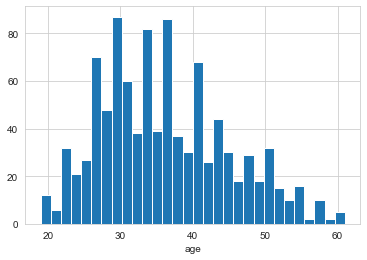

In [6]:
sns.set_style('whitegrid')
data_of_ad['age'].hist(bins=30)
plt.xlabel('age')

**Create a jointplot showing area_income versus Age.**

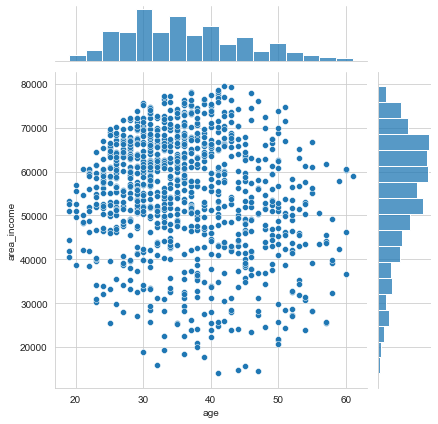

In [7]:
sns.jointplot(x='age',y='area_income',data=data_of_ad)

**Create a jointplot showing the kde distributions of daily_time_spent_on_site vs. Age.**

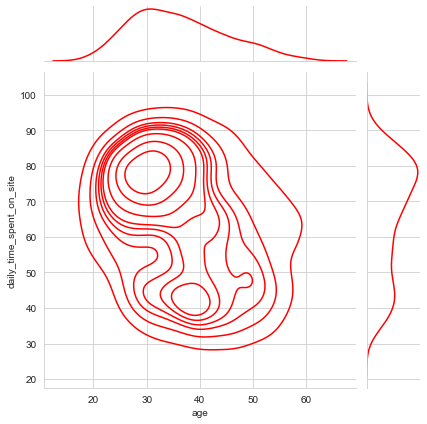

In [8]:
sns.jointplot(x='age',y='daily_time_spent_on_site',data=data_of_ad,color='red',kind='kde');

**Create a jointplot of 'daily_time_spent_on_site' vs. 'daily_internet_usage'**

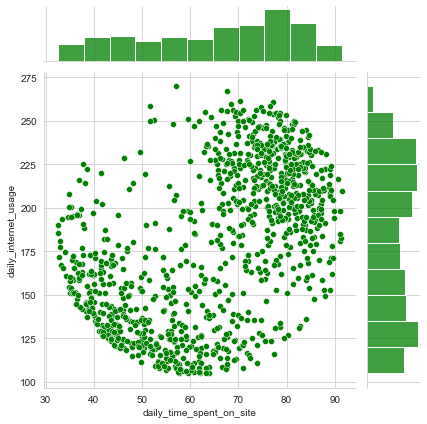

In [9]:
sns.jointplot(x='daily_time_spent_on_site',y='daily_internet_usage',data=data_of_ad,color='green')

**Finally, create a pairplot with the hue defined by the 'clicked_on_ad' column feature.**

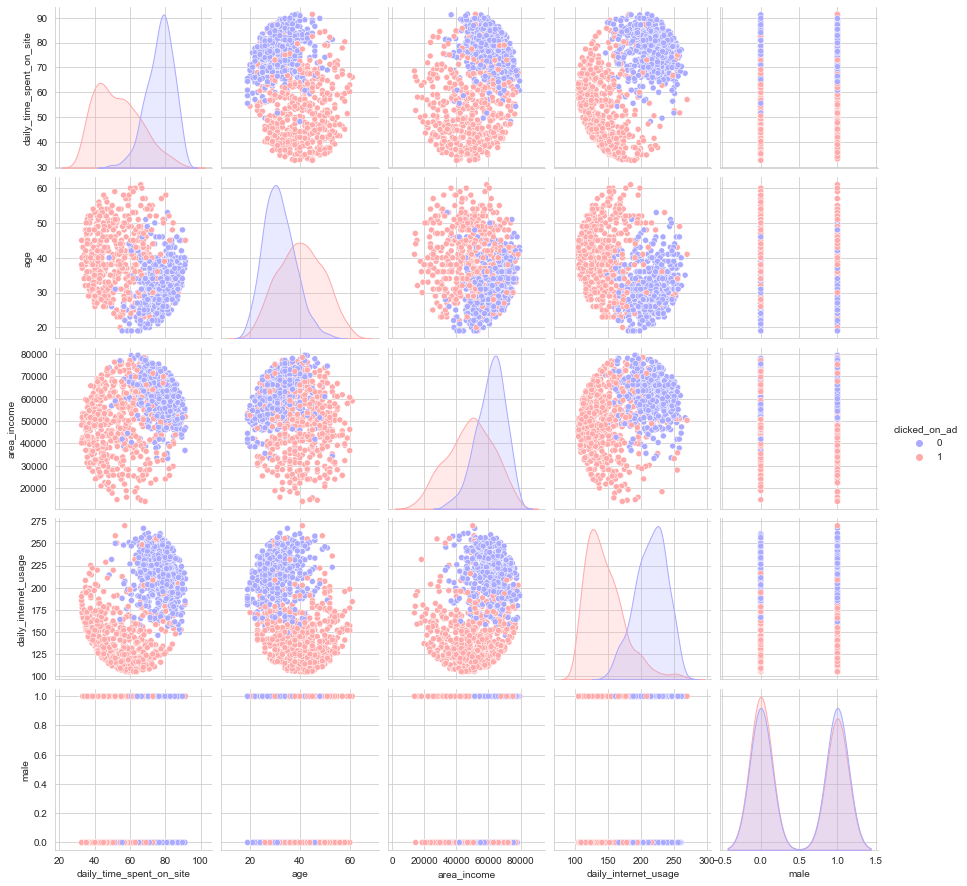

In [10]:
sns.pairplot(data_of_ad,hue='clicked_on_ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data_of_ad[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage', 'male']]
y = data_of_ad['clicked_on_ad']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [16]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

